<a href="https://colab.research.google.com/github/EminIsmayilzada/Machine-Learning/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf

# Correct the typo in the attribute name from 'fasion_mnist' to 'fashion_mnist'
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:5000], y_train_full[:5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(5000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train,X_valid,X_test=X_train/255.,X_valid/255.,X_test/255.

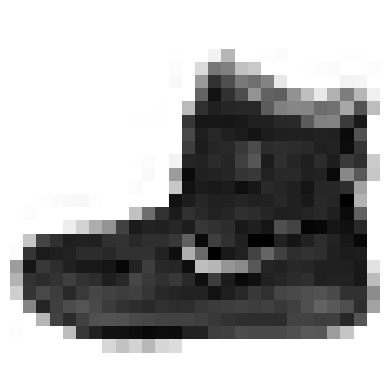

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y_train

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
            'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
y_train[0]

9

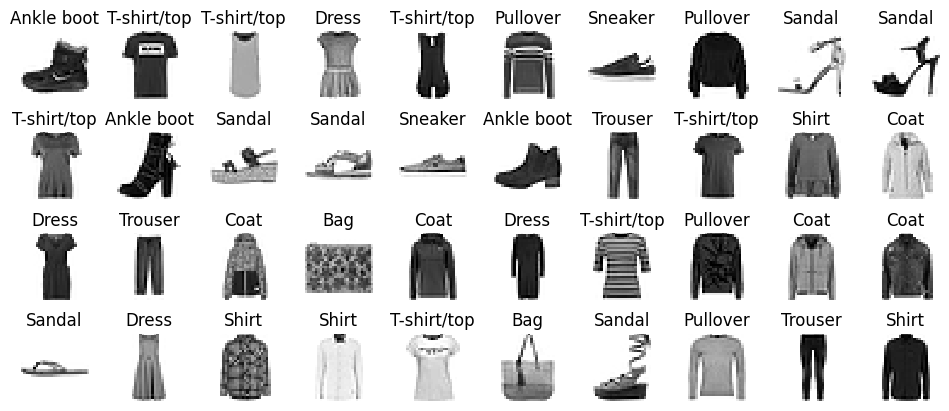

In [ ]:
n_rows=4
n_cols=10

plt.figure(figsize=(n_cols*1.2,n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index=n_cols*row+col
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2,hspace=0.5) #sekiller arasinda negder mesafe olmagini gaytarir
plt.show()

#Tensorflow Sequential API

In [ ]:
#bu kodu yazmagin 2 yolu var

In [ ]:
tf.random.set_seed(42) #numpydaki set_seedle eyni seydir
tf.keras.backend.clear_session() #her defe yeniden baslat


model=tf.keras.Sequential() #
model.add(tf.keras.layers.Input(shape=[28,28]))#her bir sekil 28 28di deye shape ele olr
model.add(tf.keras.layers.Flatten()) #model esasen 2d gozleyir bizimki 3d oldugu ucun flattenle metrixden vecora cevirirk
model.add(tf.keras.layers.Dense(300,activation='relu'))#her bi neyron bir birine birlessin.300 neyron var sonra birlessin 100 olsun sonra 10 olsun
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))#hiperparametr deyl 10 yazmag mecburidir.bu output layerdi 10 class varsa 10 goyacayg

In [ ]:
#softmax multiclass classificationd istifade olunur,sigmoid binary de
#activation=multiclass classificaiondise output layere softmax olacag

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
784*300+300  #param

235500

In [ ]:
#modelon ikinci versiyasi beledir
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

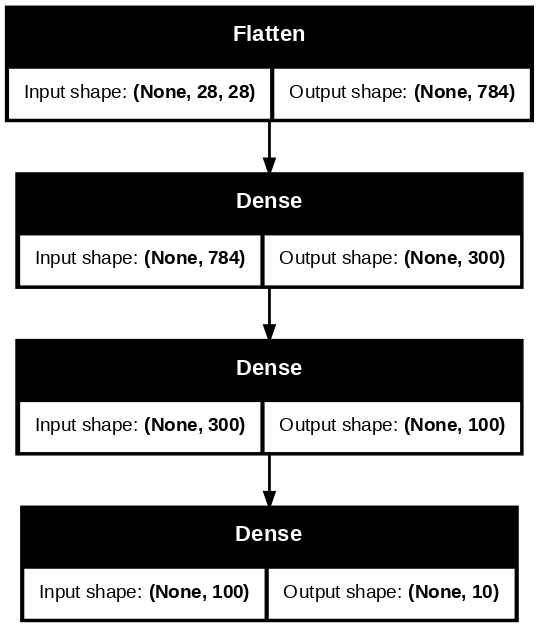

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,dpi=100)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights,biases=hidden1.get_weights()
weights

array([[ 0.00870957,  0.04091543, -0.01154124, ..., -0.02030018,
        -0.03563888, -0.00113136],
       [ 0.04987299,  0.02641041, -0.04854523, ..., -0.03734515,
        -0.02170395,  0.05900705],
       [ 0.01257288,  0.0297853 , -0.0357963 , ...,  0.05478956,
        -0.01063719,  0.0168839 ],
       ...,
       [-0.00686785, -0.03985939,  0.02059778, ..., -0.03303491,
         0.0274461 , -0.07118988],
       [-0.02168084, -0.02784494,  0.01571581, ..., -0.07051335,
         0.06537338,  0.06425312],
       [-0.03962785, -0.01514279,  0.05024536, ...,  0.01566987,
        -0.02646727,  0.04135206]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

Compiling the model

In [ ]:
#modeli iki cur compile etmek olar

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [ ]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

In [ ]:
tf.keras.utils.to_categorical([0,5,1,0],num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
import numpy as np

In [ ]:
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
      [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
      [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      axis=1)

array([0, 5, 1, 0])

Training and evaluating the model

In [ ]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.8338 - sparse_categorical_accuracy: 0.4413 - val_loss: 1.0776 - val_sparse_categorical_accuracy: 0.6712
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9742 - sparse_categorical_accuracy: 0.6985 - val_loss: 0.8381 - val_sparse_categorical_accuracy: 0.7404
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.7778 - sparse_categorical_accuracy: 0.7423 - val_loss: 0.7531 - val_sparse_categorical_accuracy: 0.7522
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6901 - sparse_categorical_accuracy: 0.7672 - val_loss: 0.7070 - val_sparse_categorical_accuracy: 0.7588
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6356 - sparse_categorical_accuracy: 0.7797 - val_loss: 0.6784 - val_sparse_categorical_accuracy: 0.7642
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5965 - sparse_categorical_accuracy: 0.7909 - val_loss: 0.6548 - val_sparse_categorical_accuracy: 0.7718
Epo

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 157}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history

{'loss': [1.5136698484420776,
  0.9085590839385986,
  0.7509524822235107,
  0.6738560795783997,
  0.6239787340164185,
  0.5873763561248779,
  0.5585638880729675,
  0.5349951386451721,
  0.5152906179428101,
  0.49843379855155945,
  0.4835302233695984,
  0.4707324206829071,
  0.45888158679008484,
  0.4484170377254486,
  0.4388163983821869,
  0.4299548268318176,
  0.42173051834106445,
  0.41404515504837036,
  0.4067942798137665,
  0.40001168847084045,
  0.39358624815940857,
  0.3872640132904053,
  0.3812243342399597,
  0.3754359483718872,
  0.36959683895111084,
  0.3641226887702942,
  0.3587794601917267,
  0.35363221168518066,
  0.3485623896121979,
  0.34365221858024597],
 'sparse_categorical_accuracy': [0.5658000111579895,
  0.7143999934196472,
  0.7522000074386597,
  0.7752000093460083,
  0.7879999876022339,
  0.7978000044822693,
  0.8118000030517578,
  0.821399986743927,
  0.8295999765396118,
  0.8360000252723694,
  0.8414000272750854,
  0.8456000089645386,
  0.8478000164031982,
  0.85

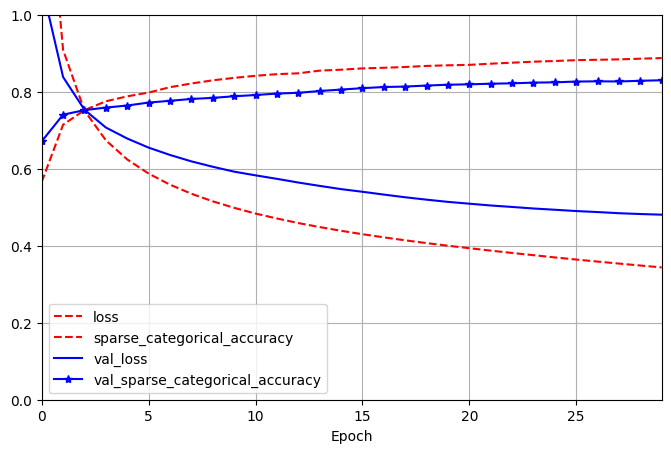

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel='Epoch',
    style=['r--','r--','b-','b-*'])
plt.legend(loc='lower left')
plt.show()

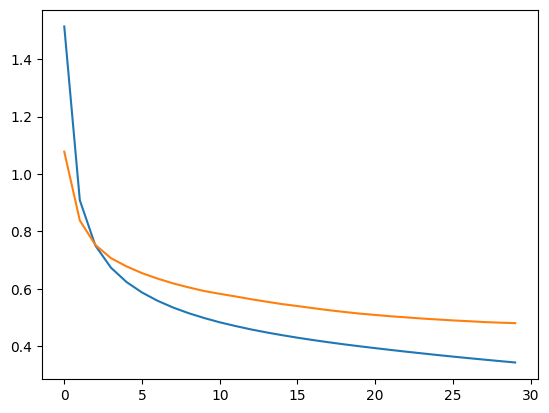

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5118 - sparse_categorical_accuracy: 0.8196


[0.5161663293838501, 0.8166000247001648]

In [ ]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.15, 0.02, 0.67],
       [0.  , 0.  , 0.82, 0.  , 0.  , 0.  , 0.17, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred=y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
class_names[9]

'Ankle boot'

In [ ]:
y_new=y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

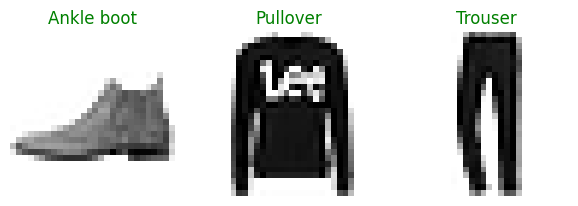

In [ ]:
plt.figure(figsize=(7.2,2.4))
for index,image in enumerate(X_new):
  plt.subplot(1,3,index+1)
  plt.imshow(image,cmap='binary',interpolation='nearest')
  plt.axis('off')
  plt.title(class_names[y_test[index]],color='g' if y_pred[index]==y_new[index] else 'r')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

plt.show()

#Regression with MLP

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(
    housing.data,housing.target,random_state=42
)
X_train,X_valid,y_train,y_valid=train_test_split(
    X_train_full,y_train_full,random_state=42
)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

norm_layer=tf.keras.layers.Normalization() #datani scale edir

model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[8]),
    norm_layer,
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])

norm_layer.adapt(X_train) #datani oyredir.sklearndski fitle eyni.

model.compile(loss='mse',optimizer='sgd',metrics=['RootMeanSquaredError'])
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_tes=model.evaluate(X_test,y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - RootMeanSquaredError: 1.1063 - loss: 1.2939 - val_RootMeanSquaredError: 3.4143 - val_loss: 11.6578
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7304 - loss: 0.5341 - val_RootMeanSquaredError: 1.3909 - val_loss: 1.9347
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6911 - loss: 0.4779 - val_RootMeanSquaredError: 1.1312 - val_loss: 1.2795
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6464 - loss: 0.4180 - val_RootMeanSquaredError: 0.8330 - val_loss: 0.6939
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6309 - loss: 0.3983 - val_RootMeanSquaredError: 0.7415 - val_loss: 0.5498
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6198 - loss: 0.3844 - val_RootMeanSquaredError: 0.5881 - val_loss: 0.3459
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6127 - lo

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250 (4.89 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 2 (12.00 B)

# Functional API

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
normalization_layer=tf.keras.layers.Normalization()
hidden_layer1=tf.keras.layers.Dense(30,activation='relu')
hidden_layer2=tf.keras.layers.Dense(30,activation='relu')
concat_layer=tf.keras.layers.Concatenate()
output_layer=tf.keras.layers.Dense(1)

input_=tf.keras.layers.Input(shape=[8])
normalized=normalization_layer(input_)
hidden1=hidden_layer1(normalized)
hidden2=hidden_layer2(hidden1)
concat=concat_layer([normalized,hidden2])
output=output_layer(concat)

model=tf.keras.Model(inputs=[input_],outputs=[output])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 8)              │             17 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            270 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ normalization[0][0],   │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
norm_layer.adapt(X_train)
model.compile(loss='mse',optimizer=optimizer,metrics=['RootMeanSquaredError'])
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - RootMeanSquaredError: 251.3322 - loss: 78381.6094 - val_RootMeanSquaredError: 3.8309 - val_loss: 14.6759
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 1.7301 - loss: 2.9998 - val_RootMeanSquaredError: 3.5076 - val_loss: 12.3030
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 1.4624 - loss: 2.1395 - val_RootMeanSquaredError: 3.2459 - val_loss: 10.5361
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 1.2800 - loss: 1.6389 - val_RootMeanSquaredError: 3.0561 - val_loss: 9.3399
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 1.1827 - loss: 1.3994 - val_RootMeanSquaredError: 2.3994 - val_loss: 5.7570
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 1.1169 - loss: 1.2479 - val_RootMeanSquaredError: 2.0577 - val_loss: 4.2341
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 1.0772 - loss:

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
input_wide=tf.keras.layers.Input(shape=[5])
input_deep=tf.keras.layers.Input(shape=[6])
norm_layer_wide=tf.keras.layers.Normalization()
norm_layer_deep=tf.keras.layers.Normalization()
norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)
hidden1=tf.keras.layers.Dense(30,activation='relu')(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat=tf.keras.layers.concatenate([norm_wide,hidden2])
output=tf.keras.layers.Dense(1)(concat)
model=tf.keras.models.Model(inputs=[input_wide,input_deep],outputs=[output])

In [ ]:
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['RootMeanSquaredError'])

X_train_wide,X_train_deep=X_train[:,:5],X_train[:,2:]
X_valid_wide,X_valid_deep=X_valid[:,:5],X_valid[:,2:]
X_test_wide,X_test_deep=X_test[:,:5],X_test[:,2:]
X_new_wide,X_new_deep=X_test_wide[:3],X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history=model.fit((X_train_wide,X_train_deep),y_train,epochs=20,
                  validation_data=((X_valid_wide,X_valid_deep),y_valid))
mse_test=model.evaluate((X_test_wide,X_test_deep),y_test)
y_pred=model.predict((X_new_wide,X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - RootMeanSquaredError: 1.5748 - loss: 2.5760 - val_RootMeanSquaredError: 1.8117 - val_loss: 3.2823
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.7727 - loss: 0.5977 - val_RootMeanSquaredError: 0.9626 - val_loss: 0.9265
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6902 - loss: 0.4766 - val_RootMeanSquaredError: 0.6961 - val_loss: 0.4846
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6634 - loss: 0.4403 - val_RootMeanSquaredError: 0.6284 - val_loss: 0.3948
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6471 - loss: 0.4189 - val_RootMeanSquaredError: 0.6250 - val_loss: 0.3906
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6348 - loss: 0.4032 - val_RootMeanSquaredError: 0.6000 - val_loss: 0.3600
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6251 - los

In [ ]:
input_wide=tf.keras.layers.Input(shape=[5])
input_deep=tf.keras.layers.Input(shape=[6])
norm_layer_wide=tf.keras.layers.Normalization()
norm_layer_deep=tf.keras.layers.Normalization()
norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)
hidden1=tf.keras.layers.Dense(30,activation='relu')(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat=tf.keras.layers.concatenate([norm_wide,hidden2])
output_layer=tf.keras.layers.Dense(1)(concat)
auxiliary_layer=tf.keras.layers.Dense(1)(hidden2)

model=tf.keras.Model(inputs=[input_wide,input_deep],
                     outputs=[output_layer,auxiliary_layer])

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=('mse','mse'),loss_weights=(0.9,0.1),optimizer=optimizer, #2output var deye 2 defe yaziriq
metrics=['RootMeanSquaredError','RootMeanSquaredError'])

In [ ]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs=20,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - dense_5_RootMeanSquaredError: 1.4809 - dense_5_loss: 2.2650 - dense_6_RootMeanSquaredError: 1.7725 - dense_6_loss: 3.2466 - loss: 2.3631 - val_dense_5_RootMeanSquaredError: 0.8329 - val_dense_5_loss: 0.6935 - val_dense_6_RootMeanSquaredError: 1.4170 - val_dense_6_loss: 2.0071 - val_loss: 0.8251
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - dense_5_RootMeanSquaredError: 0.7563 - dense_5_loss: 0.5735 - dense_6_RootMeanSquaredError: 0.9228 - dense_6_loss: 0.8531 - loss: 0.6015 - val_dense_5_RootMeanSquaredError: 0.8779 - val_dense_5_loss: 0.7704 - val_dense_6_RootMeanSquaredError: 0.8893 - val_dense_6_loss: 0.7907 - val_loss: 0.7727
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - dense_5_RootMeanSquaredError: 0.6738 - dense_5_loss: 0.4542 - dense_6_RootMeanSquaredError: 0.8001 - dense_6_loss: 0.6404 - loss: 0.4728 - val_dense_5_RootMeanSquaredError: 1.0756 - val_dense_5_loss: 1.1564 - val_dense_6_RootMeanSquaredError: 0.9

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_3           │ (None, 6)              │             13 │ input_layer_3[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 30)             │            210 │ normalization_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_2           │ (None, 5)              │             11 │ input_layer_2[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 30)             │            930 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 35)             │              0 │ normalization_2[0][0], │
│ (Concatenate)             │                        │                │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             36 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 1)              │             31 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,647 (14.26 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

 Optimizer params: 2,416 (9.44 KB)

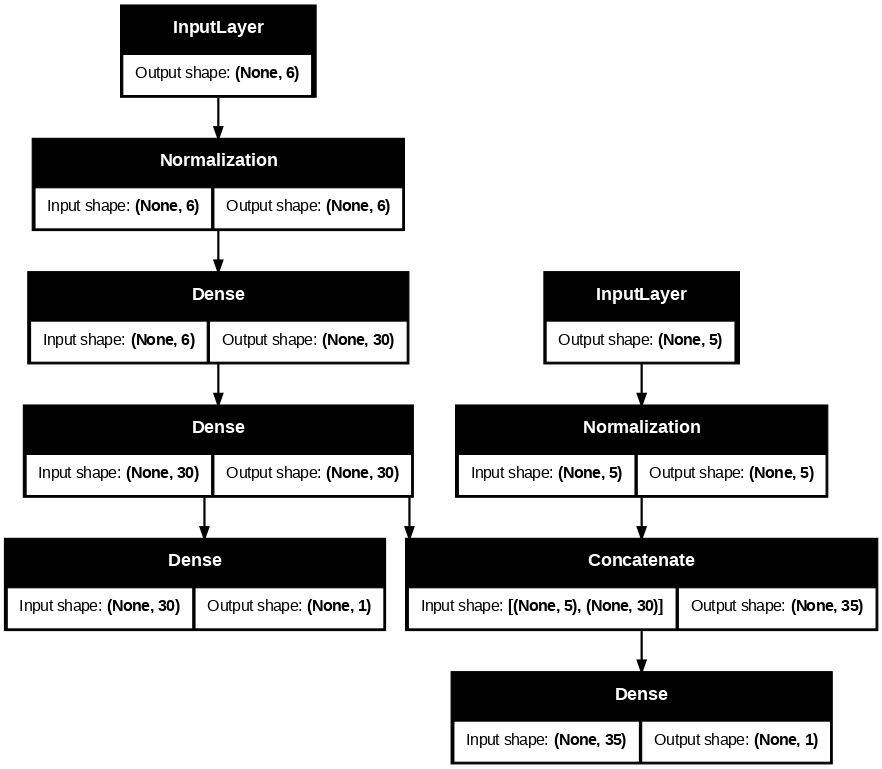

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,dpi=80)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_3           │ (None, 6)              │             13 │ input_layer_3[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 30)             │            210 │ normalization_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_2           │ (None, 5)              │             11 │ input_layer_2[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 30)             │            930 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 35)             │              0 │ normalization_2[0][0], │
│ (Concatenate)             │                        │                │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             36 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 1)              │             31 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,647 (14.26 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

 Optimizer params: 2,416 (9.44 KB)

# Using the subclass API to build dynamic models

In [ ]:
@tf.keras.utils.register_keras_serializable()
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)
# Correct the typo: 'WideAndDeepMode' should be 'WideAndDeepModel'
model = WideAndDeepModel(30, activation='relu', name='my_cool_model')

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=['mse','mse'],loss_weights=[0.9,0.1],optimizer=optimizer,
              metrics=['RootMeanSquaredError','RootMeanSquaredError'])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs=10,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid))
)
eval_results=model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))
y_pred_main,y_pred_aux=model.predict((X_new_wide,X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - RootMeanSquaredError: 1.7876 - RootMeanSquaredError_1: 2.2978 - loss: 3.5186 - mse_loss: 5.4340 - val_RootMeanSquaredError: 1.1289 - val_RootMeanSquaredError_1: 2.3184 - val_loss: 1.6845 - val_mse_loss: 5.3725
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.8338 - RootMeanSquaredError_1: 0.9151 - loss: 0.7100 - mse_loss: 0.8386 - val_RootMeanSquaredError: 0.7287 - val_RootMeanSquaredError_1: 1.3510 - val_loss: 0.6605 - val_mse_loss: 1.8245
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.7307 - RootMeanSquaredError_1: 0.7825 - loss: 0.5421 - mse_loss: 0.6125 - val_RootMeanSquaredError: 0.7751 - val_RootMeanSquaredError_1: 0.7909 - val_loss: 0.6032 - val_mse_loss: 0.6254
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6799 - RootMeanSquaredError_1: 0.7432 - loss: 0.4715 - mse_loss: 0.5526 - val_RootMeanSquaredError: 0.8290 - val_RootMeanSquaredEr

#Saving and restoring model

In [ ]:
import shutil
shutil.rmtree('my_keras_model.keras',ignore_errors=True)

In [ ]:
model.save('my_keras_model.keras')

In [ ]:
model=tf.keras.models.load_model('/content/my_keras_model.keras')
y_pred_main,y_pred_aux=model.predict((X_new_wide,X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


#Using Callbacks

In [ ]:
#birinci callback

In [ ]:
import shutil
shutil.rmtree('my_checkpoints',ignore_errors=True)

In [ ]:
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('my_checkpoints.keras',#adi
                                               save_best_only=True,#esasen bele yazilir
                                               save_freq='epoch',#her epochdan bir save etsin
                                               save_weights_only=False)#false goyanda butun modeli save edir
history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs=10,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - RootMeanSquaredError: 0.5921 - RootMeanSquaredError_1: 0.6446 - loss: 0.3571 - mse_loss: 0.4156 - val_RootMeanSquaredError: 1.3327 - val_RootMeanSquaredError_1: 0.9313 - val_loss: 1.6853 - val_mse_loss: 0.8670
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5884 - RootMeanSquaredError_1: 0.6404 - loss: 0.3526 - mse_loss: 0.4103 - val_RootMeanSquaredError: 1.5525 - val_RootMeanSquaredError_1: 1.4752 - val_loss: 2.3867 - val_mse_loss: 2.1752
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5885 - RootMeanSquaredError_1: 0.6374 - loss: 0.3524 - mse_loss: 0.4064 - val_RootMeanSquaredError: 1.5549 - val_RootMeanSquaredError_1: 1.0652 - val_loss: 2.2894 - val_mse_loss: 1.1343
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.5869 - RootMeanSquaredError_1: 0.6336 - loss: 0.3502 - mse_loss: 0.4016 - val_RootMeanSquaredError: 1.4161 - val_RootMeanSquaredE

In [ ]:
#ikinci callback

In [ ]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=10,
                                                restore_best_weights=True)

history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs=100
,validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5774 - RootMeanSquaredError_1: 0.6200 - loss: 0.3386 - mse_loss: 0.3846 - val_RootMeanSquaredError: 1.3891 - val_RootMeanSquaredError_1: 1.0235 - val_loss: 1.8414 - val_mse_loss: 1.0472
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5754 - RootMeanSquaredError_1: 0.6168 - loss: 0.3361 - mse_loss: 0.3807 - val_RootMeanSquaredError: 1.5201 - val_RootMeanSquaredError_1: 1.2549 - val_loss: 2.2371 - val_mse_loss: 1.5741
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5755 - RootMeanSquaredError_1: 0.6156 - loss: 0.3360 - mse_loss: 0.3791 - val_RootMeanSquaredError: 1.2154 - val_RootMeanSquaredError_1: 0.9186 - val_loss: 1.4138 - val_mse_loss: 0.8435
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5723 - RootMeanSquaredError_1: 0.6136 - loss: 0.3325 - mse_loss: 0.3766 - val_RootMeanSquaredError: 1.0792 - val_RootMeanSquar

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    ratio=logs['val_loss']/logs['loss']
    print(f'Epoch={epoch},val/train={ratio:.2f}')

In [ ]:
val_train_ratio_cb=PrintValTrainRatioCallback()
history=model.fit((X_train_wide,X_train_deep),(y_train,y_train),epochs=10,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
                  callbacks=[val_train_ratio_cb],verbose=0
)

Epoch=0,val/train=1.19
Epoch=1,val/train=1.10
Epoch=2,val/train=1.16
Epoch=3,val/train=1.39
Epoch=4,val/train=1.48
Epoch=5,val/train=1.71
Epoch=6,val/train=2.09
Epoch=7,val/train=2.27
Epoch=8,val/train=2.60
Epoch=9,val/train=2.15
